# This Template is created to make grading fair and straightforward. Anything not in the place as mentioned in the template would not be graded.
<br> NOTE: We would run the notebook through a Plagiarism Checker. If it is found to be copied, your work would not be graded, and the incident would be highlighted to NYU Authorities.

In [0]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [0]:
# !pip install -U -q PyDrive
# !pip install -U imbalanced-learn

import pandas as pd
import numpy as np 
from google.colab import files

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1Ba_gwX5LyznisIyPQGphn4NL4X_v3JeI'
downloaded = drive.CreateFile({'id':id})

downloaded.GetContentFile('quidditch_league_player.csv')  
dataframe = pd.read_csv('quidditch_league_player.csv')


Uncomment this block is you are running this on Jupyter instead of Google Colab

In [0]:
# data = pd.read_csv('train.csv')

In [44]:
# checking everything is in order and we did manage to connect with Google Drive / imported data

df = dataframe 
data = dataframe
data.head()


,id_num,player_id,house,gender,age,weight,foul_type_id,game_move_id,penalty_id,game_duration,...,finbourgh_flick,reverse_pass,parkins_pincer,plumpton_pass,porskoff_ploy,transylvanian_tackle,woollongong_shimmy,change,snitch_caught,quidditch_league_player
0,1,8222157,Gryffindor,Female,11.0,?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,55629189,Gryffindor,Female,12.0,?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,3,86047875,Slytherin,Female,13.0,?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,82442376,Gryffindor,Male,14.0,?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,42519267,Gryffindor,Male,14.5,?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# PART I: Preprocessing
<ol> <li> Feature Datatype Conversion From Numeric to categoric and Vice-versa. (If ANY)</li> <li> Handing Missing Values, if any </li> <li> Any other Pre-processing Used. (Give the name along with the code.)</li>

In [45]:
df.head()

,id_num,player_id,house,gender,age,weight,foul_type_id,game_move_id,penalty_id,game_duration,...,finbourgh_flick,reverse_pass,parkins_pincer,plumpton_pass,porskoff_ploy,transylvanian_tackle,woollongong_shimmy,change,snitch_caught,quidditch_league_player
0,1,8222157,Gryffindor,Female,11.0,?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,55629189,Gryffindor,Female,12.0,?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,3,86047875,Slytherin,Female,13.0,?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,82442376,Gryffindor,Male,14.0,?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,42519267,Gryffindor,Male,14.5,?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [46]:
# Running one-hot encoding to do away with the str values
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

df = dataframe

# get categorical features 
categorical_feature_mask = df.dtypes==object
categorical_cols = df.columns[categorical_feature_mask].tolist()
print(categorical_cols)

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
le_make = LabelEncoder()
missing_values = ["n/a", "na", "--","?"]
df.house.fillna(df.house.mode()[0], inplace=True)
df.player_code.fillna(df.player_code .mode()[0],inplace=True)
df.move_specialty.fillna(df.move_specialty.mode()[0],inplace=True)
df.info()

df['house']=le.fit_transform(df.house)
df['gender']=le.fit_transform(df.gender)
df['weight']=le.fit_transform(df.weight)
df['player_code']=le.fit_transform(df.player_code)
df['move_specialty']=le.fit_transform(df.move_specialty)
df['player_type']=le.fit_transform(df.player_type)
df['snitchnip']=le.fit_transform(df.snitchnip)
df['stooging']=le.fit_transform(df.stooging)
df['body_blow']=le.fit_transform(df.body_blow)
df['checking']=le.fit_transform(df.checking)
df['dopplebeater_defence']=le.fit_transform(df.dopplebeater_defence)
df['hawkshead_attacking_formation']=le.fit_transform(df.hawkshead_attacking_formation)
df['no_hands_tackle']=le.fit_transform(df.no_hands_tackle)
df['power_play']=le.fit_transform(df.power_play)
df['sloth_grip_roll']=le.fit_transform(df.sloth_grip_roll)
df['spiral_dive']=le.fit_transform(df.spiral_dive)
df['starfish_and_stick']=le.fit_transform(df.starfish_and_stick)
df['twirl']=le.fit_transform(df.twirl)
df['wronski_feint']=le.fit_transform(df.wronski_feint)
# df['zig-zag']=le.fit_transform(df.zig-zag)
df['bludger_backbeat']=le.fit_transform(df.bludger_backbeat)
df['chelmondiston_charge']=le.fit_transform(df.chelmondiston_charge)
df['dionysus_dive']=le.fit_transform(df.dionysus_dive)
df['double_eight_loop']=le.fit_transform(df.double_eight_loop)
df['finbourgh_flick']=le.fit_transform(df.finbourgh_flick)
df['reverse_pass']=le.fit_transform(df.reverse_pass)
df['parkins_pincer']=le.fit_transform(df.parkins_pincer)
df['plumpton_pass']=le.fit_transform(df.plumpton_pass)
df['porskoff_ploy']=le.fit_transform(df.porskoff_ploy)
df['transylvanian_tackle']=le.fit_transform(df.transylvanian_tackle)
df['woollongong_shimmy']=le.fit_transform(df.woollongong_shimmy)
df['change']=le.fit_transform(df.change)
df['snitch_caught']=le.fit_transform(df.snitch_caught)
df['quidditch_league_player']=le.fit_transform(df.quidditch_league_player)
# df['house']=le.fit_transform(df.house)


# cols = df.columns.tolist()
# cols = cols[-1:] + cols[:-1]
# df = df[cols]

df.head()


['house', 'gender', 'weight', 'player_code', 'move_specialty', 'player_type', 'snitchnip', 'stooging', 'body_blow', 'checking', 'dopplebeater_defence', 'hawkshead_attacking_formation', 'no_hands_tackle', 'power_play', 'sloth_grip_roll', 'spiral_dive', 'starfish_and_stick', 'twirl', 'wronski_feint', 'zig-zag', 'bludger_backbeat', 'chelmondiston_charge', 'dionysus_dive', 'double_eight_loop', 'finbourgh_flick', 'reverse_pass', 'parkins_pincer', 'plumpton_pass', 'porskoff_ploy', 'transylvanian_tackle', 'woollongong_shimmy', 'change', 'snitch_caught', 'quidditch_league_player']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101266 entries, 0 to 101265
Data columns (total 48 columns):
id_num                           101266 non-null int64
player_id                        101266 non-null int64
house                            101266 non-null object
gender                           101266 non-null object
age                              101266 non-null float64
weight                        

,id_num,player_id,house,gender,age,weight,foul_type_id,game_move_id,penalty_id,game_duration,...,finbourgh_flick,reverse_pass,parkins_pincer,plumpton_pass,porskoff_ploy,transylvanian_tackle,woollongong_shimmy,change,snitch_caught,quidditch_league_player
0,1,8222157,1,0,11.0,1,6,25,1,1,...,0,1,1,0,0,0,0,1,0,0
1,2,55629189,1,0,12.0,1,1,1,7,3,...,0,3,1,0,0,0,0,0,1,0
2,3,86047875,5,0,13.0,1,1,1,7,2,...,0,1,1,0,0,0,0,1,1,0
3,4,82442376,1,1,14.0,1,1,1,7,2,...,0,3,1,0,0,0,0,0,1,0
4,5,42519267,1,1,14.5,1,1,1,7,1,...,0,2,1,0,0,0,0,0,1,0


In [47]:
''' Check what's the percentage distribution of selected and not-selected.'''
samples = len(df)

print('Entries belonging to the class "not-selected" are: ',  df['quidditch_league_player'].value_counts()[0])
print('Entries belonging to the class "selected" are: ',  df['quidditch_league_player'].value_counts()[1], "\n")

print('Not-selected data is', df['quidditch_league_player'].value_counts()[0]/samples * 100,'% of the dataset')
print('Selected data is', df['quidditch_league_player'].value_counts()[1]/samples * 100,'% of the dataset')

Entries belonging to the class "not-selected" are:  89969
Entries belonging to the class "selected" are:  11297 

Not-selected data is 88.84423202259396 % of the dataset
Selected data is 11.15576797740604 % of the dataset


In [48]:
''' We wish to preseve the imbalance we see above in our train-test splits '''
org_df = df

X = df.drop('quidditch_league_player', axis=1)
y = df['quidditch_league_player']

train_test_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for i, j in train_test_splits.split(X, y):
  X_train, X_test = X.iloc[i], X.iloc[j]
  y_train, y_test = y.iloc[i], y.iloc[j]
  
print("Length of X_train: ", len(X_train))
print("Length of y_train: ", len(y_train))
print("Length of X_test: ", len(X_test))
print("Length of y_test: ", len(y_test))

print("Total: ", samples, "\n")

''' Check whether we have achieved what we wanted i.e. distribution is maintained. '''
_ , train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)

print("Original Ratio: ", round(df['quidditch_league_player'].value_counts()[0]/samples * 100, 6), round(df['quidditch_league_player'].value_counts()[1]/samples * 100, 6))
print("Train ratio: \t", train_counts/len(y_train)*100)
print("Test ratio: \t", test_counts/len(y_test)*100)


Length of X_train:  81014
Length of y_train:  81014
Length of X_test:  20252
Length of y_test:  20252
Total:  101266 

Original Ratio:  88.844232 11.155768
Train ratio: 	 [88.84390352 11.15609648]
Test ratio: 	 [88.84554612 11.15445388]


#### Feature Selection
Building the intuition

In [0]:
data = df
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier

features = data.columns

one_hot_encoding = preprocessing.LabelEncoder()
data = data.apply(one_hot_encoding.fit_transform)

data = data.drop(['id_num', 'player_id', 'weight', 'player_code'], axis = 1)

features = data.columns
num_features = len(features)-1 

X = data.iloc[:,0:num_features]  #independent columns
y = data.iloc[:,-1]  #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(60,60))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdBu")


#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(num_features - 12,'Score'))  #print 10 best features

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers


#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(num_features).plot(kind='barh')
# plt.show()

feat_importances.nlargest(num_features-12).plot(kind='barh')
print(feat_importances.nlargest(num_features -12))
plt.show()

<ul> 
  <li> In this part of the project we will perform random <b> undersampling/downsampling </b> of the not-selected class entries. It is a standard appoarch when dealinhg with unbalanced data and helps us get a more balanced data. Furthermore, it helps avoid overfitting.  </li>

  <li> We are simply going for a 50-50 distribution. Since we have 11297 entries of for the class "selected", we will downsample not-selected to the same number. </li> 
  
  <li> If we see that the information loss is too high and our models take a negative hit, we will consider upsampling the selected values (WHICH WE DID) </li> 

  </ul>

In [49]:
backup_df = df
df = df.sample(frac=1)

selected_df = df.loc[df['quidditch_league_player'] == 1]
not_selected_df = df.loc[df['quidditch_league_player'] == 0][:11297]

normal_distributed_df = pd.concat([selected_df, not_selected_df])
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

new_samples = len(new_df)

print('Distribution of the Classes in the subsample dataset')
print(new_df['quidditch_league_player'].value_counts()/new_samples)

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: quidditch_league_player, dtype: float64


Now, that didn't work quite so well, so we are going to up-sample the selected values using SMOTE. MOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems". 

![SMOTE VISUALIZATION](https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_3.png")

One mistake that we were making earlier was to undersample and oversample the data before cross-validation (CV). This wasn't intuitive and took some pondering before we figured out where we were going wrong. It seem obvious in retrospect if we think about how CV works. For instance, if splits = 3, 1/3 is validation set and 2/3 is used to train. Ideally, the 1/3 should not be touched before we start the training process. This is not preserved if we perform upsampling/downsampling before CV. The phenomena is called "data-leakage" and is explained over at [Machine Learning Mastery](https://machinelearningmastery.com/data-leakage-machine-learning/)

In [50]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV

selected_features = [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 30, 44, 45, 46]
X = df.iloc[:, selected_features]
y = df.iloc[:, -1]

train_test_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for i, j in train_test_splits.split(X, y):
  X_train, X_test = X.iloc[i], X.iloc[j]
  y_train, y_test = y.iloc[i], y.iloc[j]

print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_test), len(y_test)))

Length of X (train): 81014 | Length of y (train): 81014
Length of X (test): 20252 | Length of y (test): 20252


#### Correlation Matrix 
<ul> 
 <li> As described in the data cleaning notebook provided to us, correlation matrices can convey a great deal about the data we have and a feature's effect/correlation with the target class. </li>

 <li> Negative correlations are somerthing we need to preserve as the lower these values, the more likely is the data to be a "selected" case.  </li>
  
  </ul>

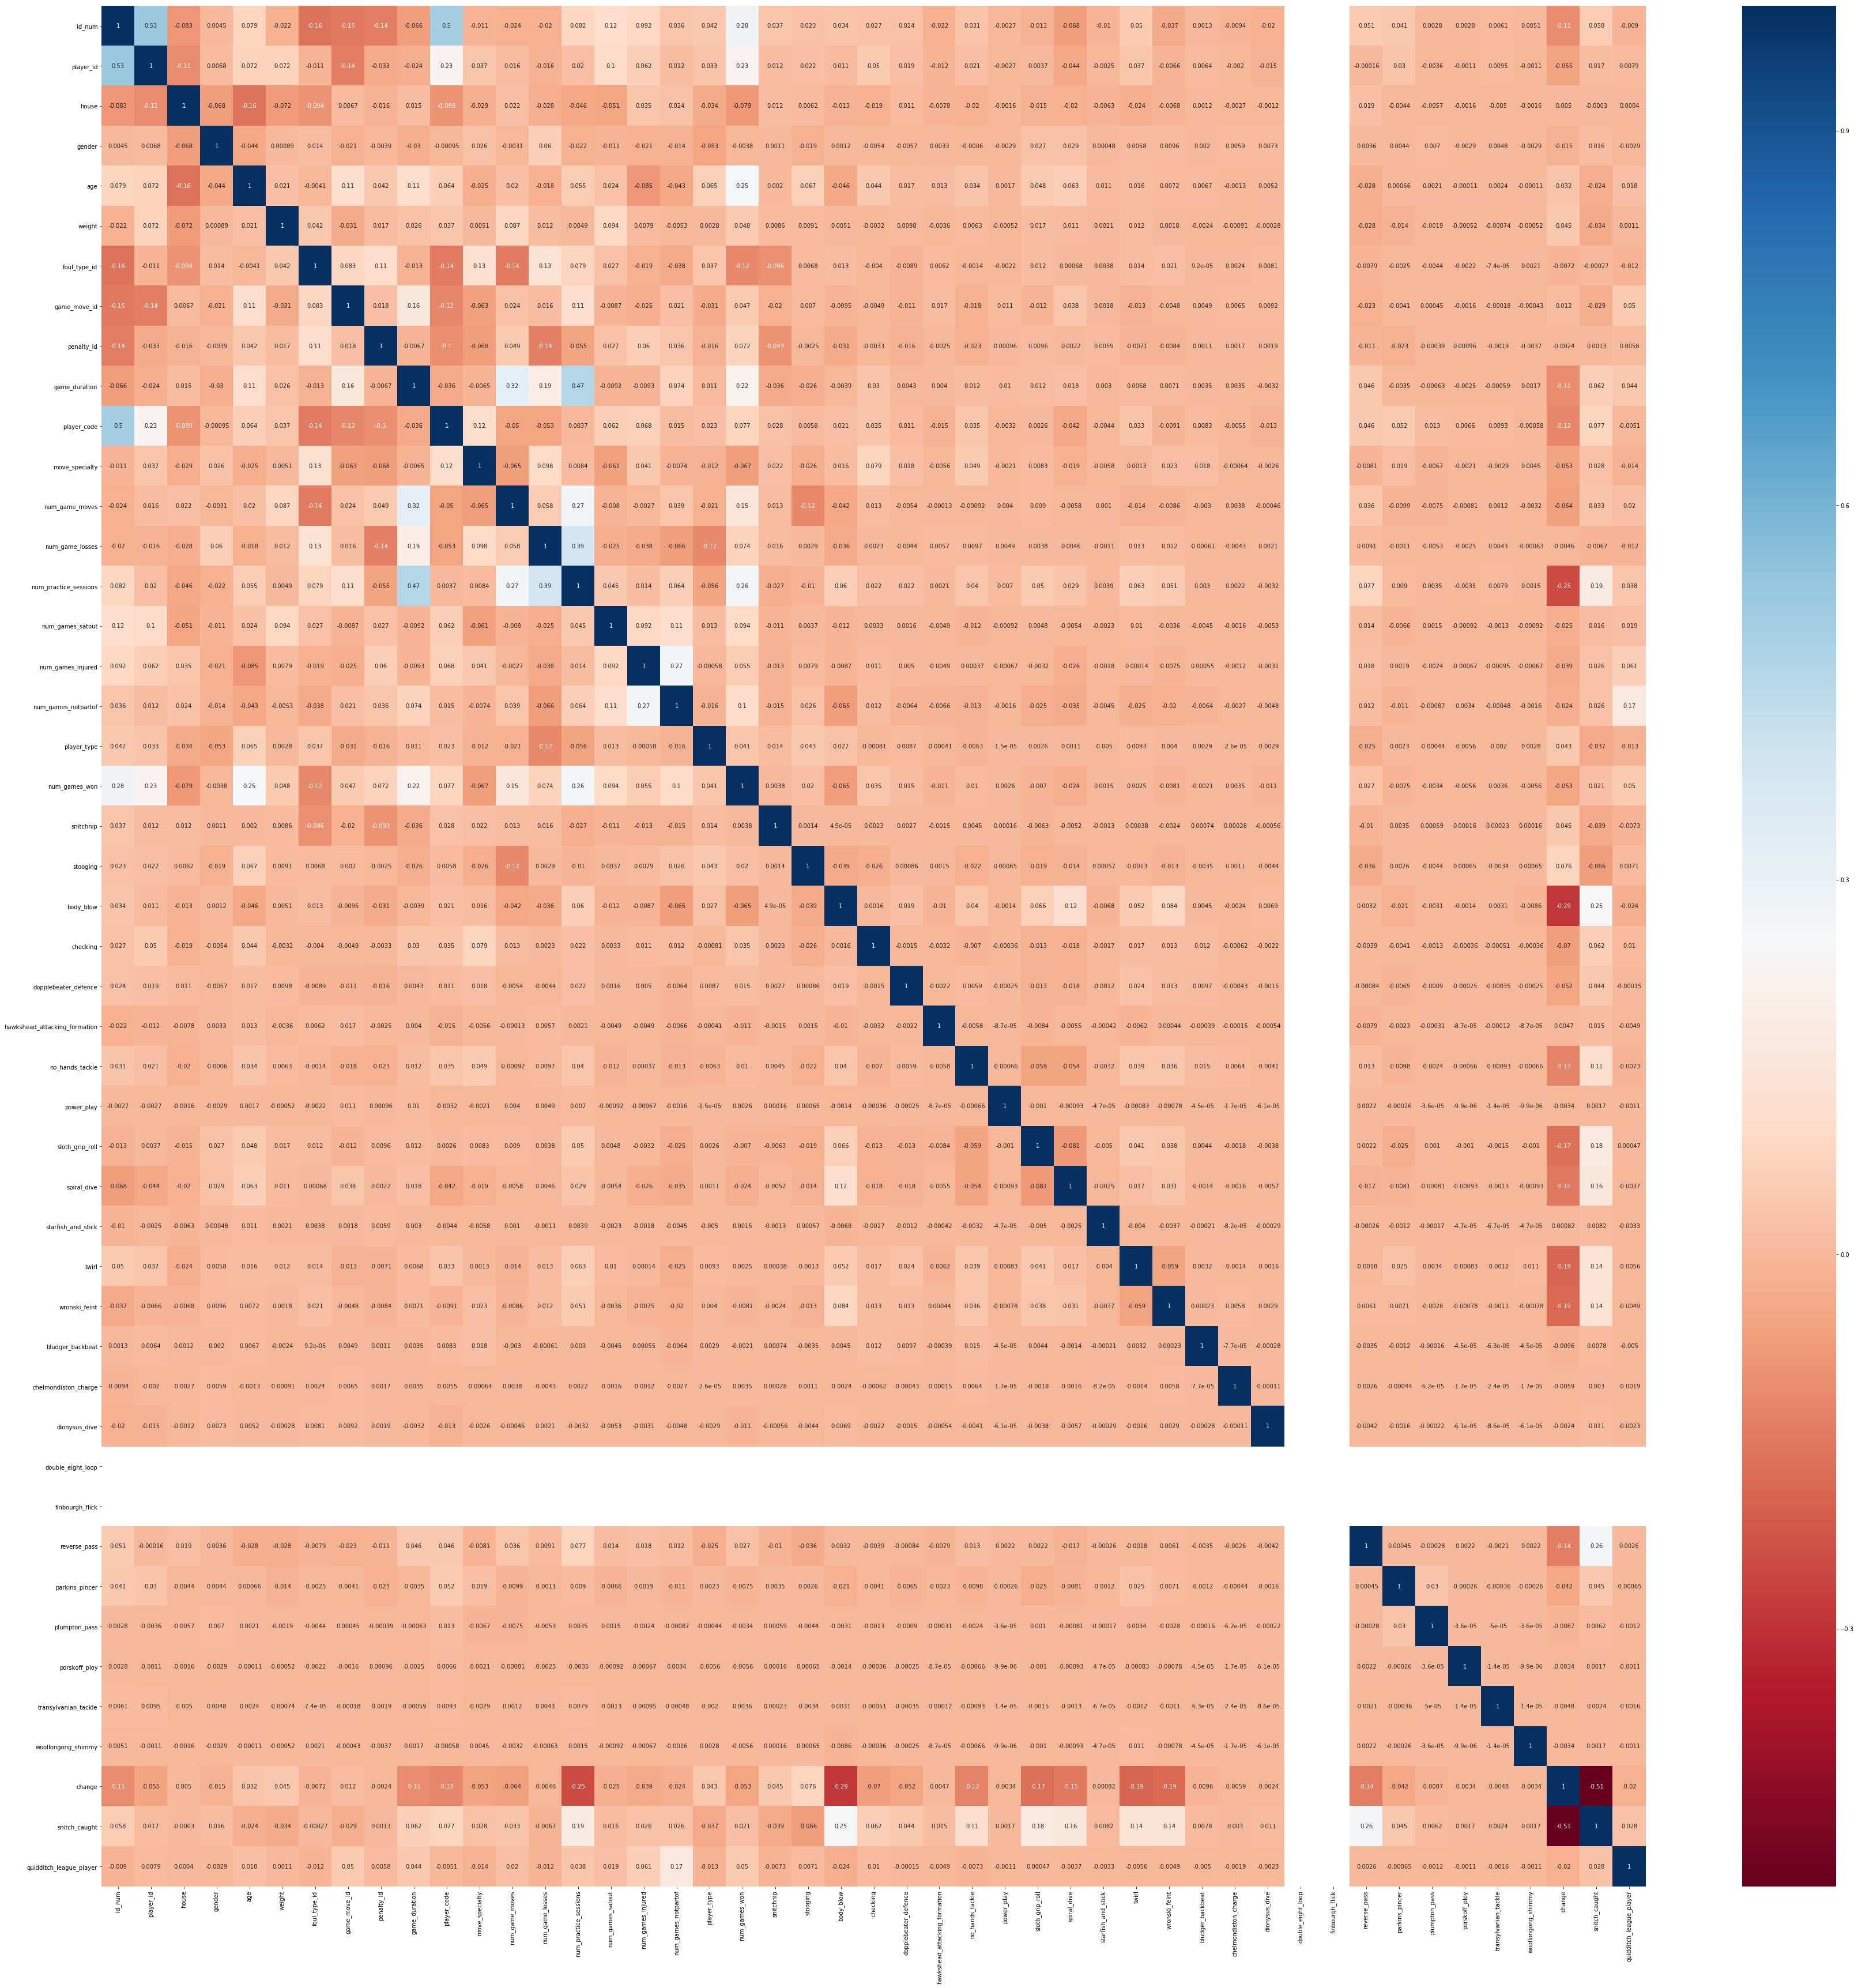

In [51]:
corrmat = new_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(60,60))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdBu")

# PART II: Classification

### Model 1:
Model Name: Logistic Regression <br>
Evaluation method and metric used Name: F1-score (Precision and Recall)-<br>
Name of the Hyperparameter used:--------------......<br>

In [0]:
# from sklearn.svm import SVC
# from sklearn.model_selection import RandomizedSearchCV

# selected_features = [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 30, 44, 45, 46]
# # selected_features = [7, 9, 11, 12, 14, 15, 16, 17, 19]
# #selected_features = [2, 3, 4, 5, 6, 10, 11, 12, 13, 14, 15, 16, 17, 21, 38, 44, 45]
# # selected_features = ['age','body_blow','change', 'checking','chelmondiston_charge','dionysus_dive','dopplebeater_defence','foul_type_id','game_duration','game_move_id','gender','house','move_specialty','no_hands_tackle','num_game_losses','num_game_moves','num_games_injured','num_games_notpartof','num_games_satout','num_games_won','num_practice_sessions','parkins_pincer','penalty_id','player_type','plumpton_pass','reverse_pass','sloth_grip_roll','snitch_caught','snitchnip','spiral_dive','starfish_and_stick','transylvanian_tackle','twirl','wronski_feint','zig-zag']
# X = df.iloc[:, selected_features]
# y = df.iloc[:, -1]

# train_test_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# for i, j in train_test_splits.split(X, y):
#   X_train, X_test = X.iloc[i], X.iloc[j]
#   y_train, y_test = y.iloc[i], y.iloc[j]
  
  
# svm = SVC(kernel ='rbf', C = 0.5, gamma='auto')
# svm.fit(X_train, y_train)
# predictions = svm.predict(X_test)

# print(classification_report(y_test, predictions))

# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test, predictions))

# from sklearn.metrics import roc_curve, auc

# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(2):
#     fpr[i], tpr[i], _ = roc_curve(y_test, predictions, pos_label=2)
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predictions.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# print(roc_auc_score(y_test, predictions))

### Model 2:
Model Name: Random Forest <br>
Evaluation method and metric used Name:-F1-score (Precision and Recall)<br>
Name of the Hyperparameter used: Forest Size <br>



In [53]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier


# selected_features = [7, 9, 11, 12, 14, 15, 16, 17, 19]
selected_features = [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 30, 44, 45, 46]
# selected_features = [2, 3, 4, 5, 6, 10, 11, 12, 13, 14, 15, 16, 17, 21, 38, 44, 45]
X = df.iloc[:, selected_features]
y = df.iloc[:, -1]

train_test_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for i, j in train_test_splits.split(X, y):
  X_train, X_test = X.iloc[i], X.iloc[j]
  y_train, y_test = y.iloc[i], y.iloc[j]

print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_test), len(y_test)))

# List to append the score and then find the average
accuracy = []
precision = []
recall = []
f1 = []
auc = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_

forest = RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=6, min_samples_split=2, n_estimators=200)
# print(rand_log_reg.best_estimator_)

for train_index, test_index in train_test_splits.split(X_train, y_train):
  
    print("Training index: ", train_index, "Validation Index: ", test_index)
    pipeline = make_pipeline(SMOTEENN(sampling_strategy='minority'), forest)
    
    # print(X_train.iloc[train_index], y_train.iloc[train_index])
    model = pipeline.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    
    prediction = forest.predict(X_train.iloc[test_index])
    
    accuracy.append(pipeline.score(X_train.iloc[test_index], y_train.iloc[test_index]))
    precision.append(precision_score(y_train.iloc[test_index], prediction))
    recall.append(recall_score(y_train.iloc[test_index], prediction))
    f1.append(f1_score(y_train.iloc[test_index], prediction))
    auc.append(roc_auc_score(y_train.iloc[test_index], prediction))
    

print('')
print("Accuracy: ", np.mean(accuracy))
print("Precision: ", np.mean(precision))
print("Recall: ", np.mean(recall))
print("F1-score: ", np.mean(f1), "\n")


prediction = forest.predict(X_test)
print(classification_report(y_test, prediction))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction))

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, prediction, pos_label=2)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), prediction.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(roc_auc_score(y_test, prediction))

Length of X (train): 81014 | Length of y (train): 81014
Length of X (test): 20252 | Length of y (test): 20252
Training index:  [15979 15986 15989 ... 81011 81012 81013] Validation Index:  [    0     1     2 ... 16230 16231 16232]
Training index:  [    0     1     2 ... 81011 81012 81013] Validation Index:  [15979 15986 15989 ... 32460 32461 32462]
Training index:  [    0     1     2 ... 81011 81012 81013] Validation Index:  [31843 31846 31849 ... 48687 48688 48689]
Training index:  [    0     1     2 ... 81011 81012 81013] Validation Index:  [47873 47876 47906 ... 64867 64868 64870]
Training index:  [    0     1     2 ... 64867 64868 64870] Validation Index:  [64341 64343 64347 ... 81011 81012 81013]

Accuracy:  0.7913570722707195
Precision:  0.20473482347177335
Recall:  0.301613746443281
F1-score:  0.24385835745708967 

              precision    recall  f1-score   support

           0       0.91      0.86      0.88     17993
           1       0.21      0.30      0.25      2259

   

### Model 3:
Model Name: Multi-layer Perceptron <br>
Evaluation method and metric used Name:-F1-score (Precision and Recall)<br>
Name of the Hyperparameter used: Hidden Layer, # hidden layers, activation and threshold <br>

In [54]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier


# selected_features = [7, 9, 11, 12, 14, 15, 16, 17, 19]
selected_features = [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 30, 44, 45, 46]

# selected_features = [2, 3, 4, 5, 6, 10, 11, 12, 13, 14, 15, 16, 17, 21, 38, 44, 45]
X = df.iloc[:, selected_features]
y = df.iloc[:, -1]

train_test_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for i, j in train_test_splits.split(X, y):
  X_train, X_test = X.iloc[i], X.iloc[j]
  y_train, y_test = y.iloc[i], y.iloc[j]


accuracy = []
precision = []
recall = []
f1 = []
auc = []

mlp_sm = MLPClassifier(max_iter = 100, activation = 'relu', hidden_layer_sizes = (13, 13, 13), learning_rate = 'constant', alpha=0.001, solver = 'adam', early_stopping = True)


for train_index, test_index in train_test_splits.split(X_train, y_train):
  
    print("Training index: ", train_index, "Validation Index: ", test_index)
    pipeline = make_pipeline(SMOTEENN(sampling_strategy='minority'), mlp_sm)
    
    model = pipeline.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    
    prediction = mlp_sm.predict(X_train.iloc[test_index])
    
    accuracy.append(pipeline.score(X_train.iloc[test_index], y_train.iloc[test_index]))
    precision.append(precision_score(y_train.iloc[test_index], prediction))
    recall.append(recall_score(y_train.iloc[test_index], prediction))
    f1.append(f1_score(y_train.iloc[test_index], prediction))
    auc.append(roc_auc_score(y_train.iloc[test_index], prediction))
    

print('')
print("Accuracy: ", np.mean(accuracy))
print("Precision: ", np.mean(precision))
print("Recall: ", np.mean(recall))
print("F1-score: ", np.mean(f1), "\n")


prediction = mlp_sm.predict(X_test)
print(classification_report(y_test, prediction))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction))

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, prediction, pos_label=2)
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), prediction.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(roc_auc_score(y_test, prediction))

Training index:  [15979 15986 15989 ... 81011 81012 81013] Validation Index:  [    0     1     2 ... 16230 16231 16232]
Training index:  [    0     1     2 ... 81011 81012 81013] Validation Index:  [15979 15986 15989 ... 32460 32461 32462]
Training index:  [    0     1     2 ... 81011 81012 81013] Validation Index:  [31843 31846 31849 ... 48687 48688 48689]
Training index:  [    0     1     2 ... 81011 81012 81013] Validation Index:  [47873 47876 47906 ... 64867 64868 64870]
Training index:  [    0     1     2 ... 64867 64868 64870] Validation Index:  [64341 64343 64347 ... 81011 81012 81013]

Accuracy:  0.5265499235872417
Precision:  0.14829697790345614
Recall:  0.6783575182059934
F1-score:  0.24254411435682935 

              precision    recall  f1-score   support

           0       0.93      0.55      0.69     17993
           1       0.16      0.67      0.25      2259

   micro avg       0.56      0.56      0.56     20252
   macro avg       0.54      0.61      0.47     20252
weig

# PART III: Best Hypothesis:


Model Name:  Random Forest <br>
Reason: The reason for choosing this is three-fold. <br>
Hyper-parameter Value: {criterion='entropy', max_depth=11, min_samples_leaf=6, min_samples_split=2, n_estimators=200}

In [0]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier


# selected_features = [7, 9, 11, 12, 14, 15, 16, 17, 19]
selected_features = [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 30, 44, 45, 46]
# selected_features = [2, 3, 4, 5, 6, 10, 11, 12, 13, 14, 15, 16, 17, 21, 38, 44, 45]
X = df.iloc[:, selected_features]
y = df.iloc[:, -1]

train_test_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for i, j in train_test_splits.split(X, y):
  X_train, X_test = X.iloc[i], X.iloc[j]
  y_train, y_test = y.iloc[i], y.iloc[j]

print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_test), len(y_test)))

# List to append the score and then find the average
accuracy = []
precision = []
recall = []
f1 = []
auc = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_

forest = RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=6, min_samples_split=2, n_estimators=200)
# print(rand_log_reg.best_estimator_)

for train_index, test_index in train_test_splits.split(X_train, y_train):
  
    print("Training index: ", train_index, "Validation Index: ", test_index)
    pipeline = make_pipeline(SMOTEENN(sampling_strategy='minority'), forest)
    
    # print(X_train.iloc[train_index], y_train.iloc[train_index])
    model = pipeline.fit(X_train.iloc[train_index], y_train.iloc[train_index])
    
    prediction = forest.predict(X_train.iloc[test_index])
    
    accuracy.append(pipeline.score(X_train.iloc[test_index], y_train.iloc[test_index]))
    precision.append(precision_score(y_train.iloc[test_index], prediction))
    recall.append(recall_score(y_train.iloc[test_index], prediction))
    f1.append(f1_score(y_train.iloc[test_index], prediction))
    auc.append(roc_auc_score(y_train.iloc[test_index], prediction))
    

print('')
print("Accuracy: ", np.mean(accuracy))
print("Precision: ", np.mean(precision))
print("Recall: ", np.mean(recall))
print("F1-score: ", np.mean(f1), "\n")


prediction = forest.predict(X_test)
print(classification_report(y_test, prediction))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction))

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, prediction, pos_label=2)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), prediction.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(roc_auc_score(y_test, prediction))

## Fetching test data and generating a prediction (output)

In [55]:
from google.colab import files


id = '1QN95NBwuKEVu-o0UThNaIDqThQDTWYiI'
downloaded = drive.CreateFile({'id':id})
 
downloaded.GetContentFile('test.csv)  
test_dataset = pd.read_csv('test.csv')

df = test_dataset
# one-hot encoding
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
le_make = LabelEncoder()
missing_values = ["n/a", "na", "--","?"]
df.house.fillna(df.house.mode()[0], inplace=True)
df.player_code.fillna(df.player_code .mode()[0],inplace=True)
df.move_specialty.fillna(df.move_specialty.mode()[0],inplace=True)
df.info()

df['house']=le.fit_transform(df.house)
df['gender']=le.fit_transform(df.gender)
df['weight']=le.fit_transform(df.weight)
df['player_code']=le.fit_transform(df.player_code)
df['move_specialty']=le.fit_transform(df.move_specialty)
df['player_type']=le.fit_transform(df.player_type)
df['snitchnip']=le.fit_transform(df.snitchnip)
df['stooging']=le.fit_transform(df.stooging)
df['body_blow']=le.fit_transform(df.body_blow)
df['checking']=le.fit_transform(df.checking)
df['dopplebeater_defence']=le.fit_transform(df.dopplebeater_defence)
df['hawkshead_attacking_formation']=le.fit_transform(df.hawkshead_attacking_formation)
df['no_hands_tackle']=le.fit_transform(df.no_hands_tackle)
df['power_play']=le.fit_transform(df.power_play)
df['sloth_grip_roll']=le.fit_transform(df.sloth_grip_roll)
df['spiral_dive']=le.fit_transform(df.spiral_dive)
df['starfish_and_stick']=le.fit_transform(df.starfish_and_stick)
df['twirl']=le.fit_transform(df.twirl)
df['wronski_feint']=le.fit_transform(df.wronski_feint)
# df['zig-zag']=le.fit_transform(df.zig-zag)
df['bludger_backbeat']=le.fit_transform(df.bludger_backbeat)
df['chelmondiston_charge']=le.fit_transform(df.chelmondiston_charge)
df['dionysus_dive']=le.fit_transform(df.dionysus_dive)
df['double_eight_loop']=le.fit_transform(df.double_eight_loop)
df['finbourgh_flick']=le.fit_transform(df.finbourgh_flick)
df['reverse_pass']=le.fit_transform(df.reverse_pass)
df['parkins_pincer']=le.fit_transform(df.parkins_pincer)
df['plumpton_pass']=le.fit_transform(df.plumpton_pass)
df['porskoff_ploy']=le.fit_transform(df.porskoff_ploy)
df['transylvanian_tackle']=le.fit_transform(df.transylvanian_tackle)
df['woollongong_shimmy']=le.fit_transform(df.woollongong_shimmy)
df['change']=le.fit_transform(df.change)
df['snitch_caught']=le.fit_transform(df.snitch_caught)


df.head(n=30)

test_dataset = df


selected_features = [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 30, 44, 45, 46]
modified_test_dataset = test_dataset.iloc[:, selected_features]
    
print(modified_test_dataset.head())
predictions = forest.predict(modified_test_dataset)

result = []
for i in range(len(predictions)):
    if predictions[i] == 0:
        result.append("NO")
    else:
        result.append("YES")
        

uid = np.arange(1, 501)
output = pd.DataFrame(predictions, columns = ['quidditch_league_player'])
output.insert(0, "id_num", uid, True)

output.to_csv('output.csv', index=False)
files.download('output.csv')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 47 columns):
id_num                           500 non-null int64
player_id                        500 non-null int64
house                            500 non-null object
gender                           500 non-null object
age                              500 non-null float64
weight                           500 non-null object
foul_type_id                     500 non-null int64
game_move_id                     500 non-null int64
penalty_id                       500 non-null int64
game_duration                    500 non-null int64
player_code                      500 non-null object
move_specialty                   500 non-null object
num_game_moves                   500 non-null int64
num_game_losses                  500 non-null int64
num_practice_sessions            500 non-null int64
num_games_satout                 500 non-null int64
num_games_injured                500 non-null int64
num_